# **Exploratory Data Analysis Lab**


* * *


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status==200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [14]:
import piplite
await piplite.install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<ipython-input-24-e6cc71650f0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ConvertedComp'], bins=None, kde=True)


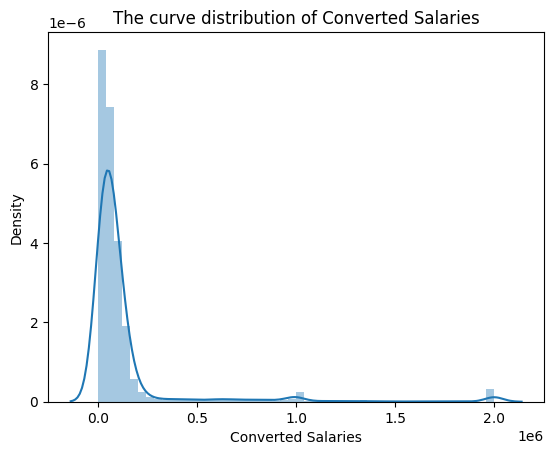

In [24]:
# your code goes here
sns.distplot(df['ConvertedComp'], bins=None, kde=True)
plt.title('The curve distribution of Converted Salaries')
plt.xlabel('Converted Salaries')
plt.show()

Plot the histogram for the column `ConvertedComp`.


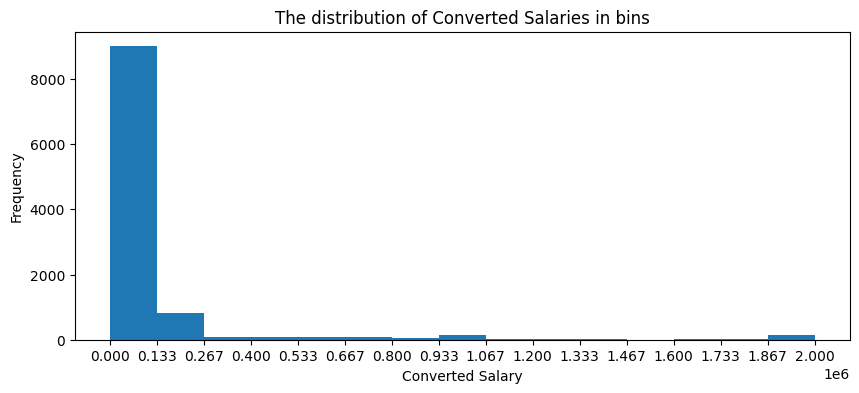

In [21]:
# your code goes here
plt.figure(figsize=(10,4))
fig = plt.hist(df['ConvertedComp'], bins=15)
plt.title('The distribution of Converted Salaries in bins')
plt.xlabel('Converted Salary')
plt.ylabel('Frequency')
plt.xticks(fig[1])
plt.show()

In [26]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [102]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [33]:
# your code goes here
df['Gender'][df['Gender']=='Man'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [40]:
# your code goes here
df['ConvertedComp'][df['Gender']=='Woman'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [41]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


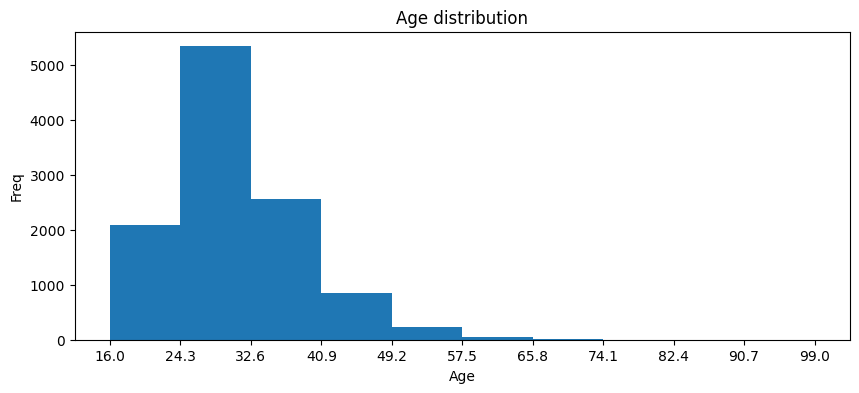

In [103]:
# your code goes here
plt.figure(figsize=(10,4))
fig=plt.hist(df['Age'], bins=10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.xticks(fig[1])
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


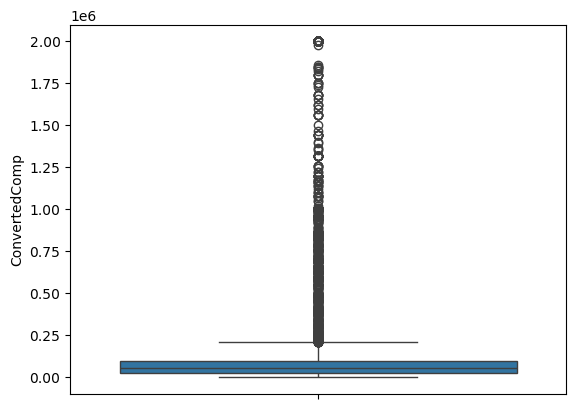

In [62]:
# your code goes here
sns.boxplot(data=df, y='ConvertedComp')
plt.show()

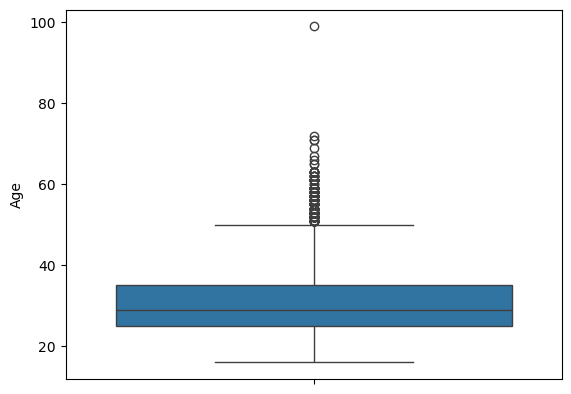

In [121]:
sns.boxplot(data=df, y='Age')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [70]:
stats = df['ConvertedComp'].describe()
stats

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [89]:
# your code goes here
#IQR = Q3-Q1
q1= df['ConvertedComp'].quantile(0.25)
q3= df['ConvertedComp'].quantile(0.75)
iqr = q3-q1
outl = df[((df['ConvertedComp']<(q1-1.5*iqr))|(df['ConvertedComp']>(q3+1.5*iqr)))]
number_of_outliers= len(outl)
number_of_outliers

879

Find out the upper and lower bounds.


In [77]:
# your code goes here
upper = df['ConvertedComp'].max()
lower = df['ConvertedComp'].min()
print('The upper bound is:', upper)
print('The lower bound is:', lower)

The upper bound is: 2000000.0
The lower bound is: 0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [91]:
# your code goes here
def find_outliers(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    iqr = q3-q1
    outliers = df[((df<(q1-1.5*iqr))|(df>(q3+1.5*iqr)))]
    return len(outliers)
find_outliers(df['ConvertedComp'])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [122]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q2=df['ConvertedComp'].quantile(0.75)
iqr = q3-q1
no_outliers = df[~((df['ConvertedComp']<(q1-1.5*iqr))|(df['ConvertedComp']>(q3+1.5*iqr)))]
no_outliers['ConvertedComp'].median()
no_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [97]:
# your code goes here
numerics = ['int16', 'int32', 'int64', 'float16', 'float32','float64']
df_num = df.select_dtypes(include=numerics)

In [100]:
df_num.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
